In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import numpy as np

In [14]:
def plot_globe(ds, sst):
    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree()) 

    ax.contourf(ds['lon'],ds['lat'],
                np.mean(sst, axis=0),cmap='RdBu_r')
    ax.coastlines() 
    plt.show()

In [2]:
dir0 = Path('el_nino/')
file_sst = 'sst.mnmean.nc'

# load the data set with xarray
ds_nino = xr.open_dataset(Path(dir0, file_sst))

In [3]:
# determining the El Nino 3.4 boundary
ds_nino=ds_nino.reindex(lat=list(reversed(ds_nino['lat'])))
ds_nino34=ds_nino.sel(lon=slice(360-170,360-120),lat=slice(-5,5))
ds_nino34

<xarray.Dataset>
Dimensions:    (lat: 10, lon: 50, time: 475, nbnds: 2)
Coordinates:
  * lat        (lat) float32 -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2.5 3.5 4.5
  * lon        (lon) float32 190.5 191.5 192.5 193.5 ... 236.5 237.5 238.5 239.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2021-06-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [4]:
np.shape(ds_nino34['sst'])

(475, 10, 50)

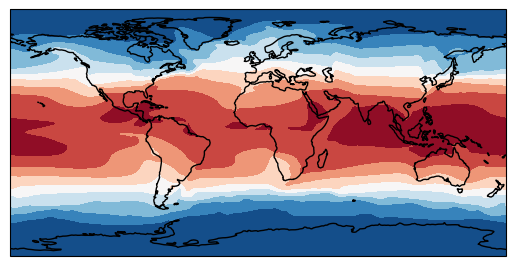

In [25]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree()) 

ax.contourf(ds_nino['lon'],ds_nino['lat'],
             np.mean(ds_nino['sst'], axis=0),cmap='RdBu_r')
ax.coastlines() 

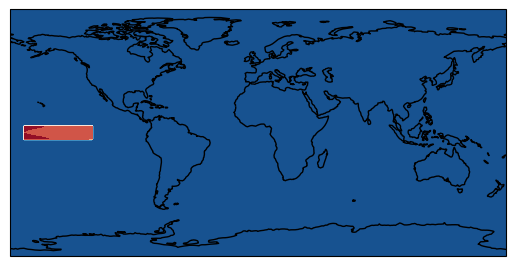

In [13]:
new_sst = np.zeros_like(ds_nino['sst'])
new_sst[:, 85:95, 190:240] = ds_nino34['sst']
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree()) 

ax.contourf(ds_nino['lon'],ds_nino['lat'],
             np.mean(new_sst, axis=0),cmap='RdBu_r')
ax.coastlines() 


AttributeError: 'Figure' object has no attribute 'plot'

<Figure size 500x300 with 0 Axes>

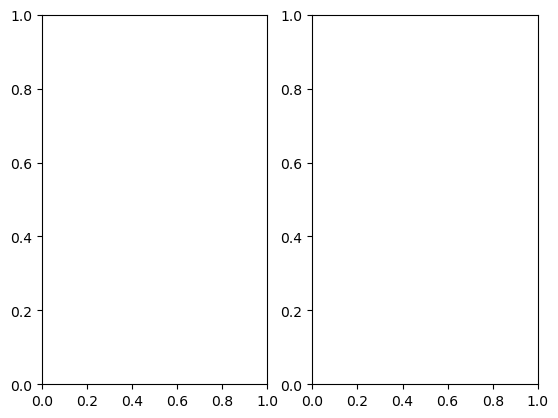

In [26]:
# select years where ElNino occurred
nino_very_strong = [["1982, 1983"],["1997, 1998"], ["2015-2016"]]
nino_strong = [["1991, 1992"], ["2002, 2003"], ["2009, 2010"]]
nino_weak = [["2004-2005"], ["2006, 2007"], ["2014, 2015"], ["2018-2019"]]

nina_strong = [["1988", "1989"], ["1998, 1999"]]
# nina_weak ,

plt.figure(figsize=(5, 3))
ax1, ax2 = plt.subplots(1, 2)
ds_nino8283 = ds_nino34.sel(time=slice('1982-01-01','1983-12-01'))
ax1.contourf(ds_nino8283["lon"], ds_nino8283["lat"], np.mean(ds_nino8283["sst"], axis=0))
ds_nino9900 = ds_nino34.sel(time=slice('1999-01-01','2000-12-01'))
ax2.contourf(ds_nino9900["lon"], ds_nino9900["lat"], np.mean(ds_nino9900["sst"], axis=0))
plt.colorbar()

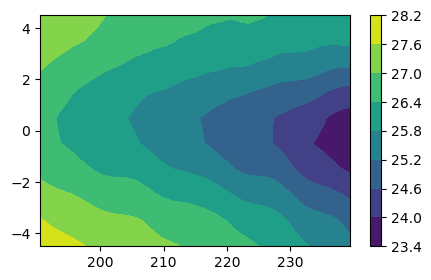

In [23]:
plt.figure(figsize=(5, 3))
ds_nino8283 = ds_nino34.sel(time=slice('1999-01-01','2000-12-01'))
plt.contourf(ds_nino8283["lon"], ds_nino8283["lat"], np.mean(ds_nino8283["sst"], axis=0))
plt.colorbar()